In [39]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import numpy as np

import datetime as dt

In [40]:
df = pd.read_csv("Resources/percent_all.csv")

df

,movie_id,release_date,percent_female
0,862,1995-10-30,0.181818
1,8844,1995-12-15,0.000000
2,15602,1995-12-22,0.000000
3,31357,1995-12-22,0.333333
4,11862,1995-02-10,0.500000
...,...,...,...
30672,390959,2000-10-22,0.250000
30673,289923,2000-10-03,0.000000
30674,222848,1995-01-01,0.000000
30675,30840,1991-05-13,0.500000


In [41]:
# sort data by release_date
df=df.sort_values("release_date")

df

,movie_id,release_date,percent_female
17904,43387,1950-01-01,0.000000
18314,109364,1950-01-01,0.000000
14064,83015,1950-01-01,0.000000
20273,43395,1950-01-01,0.000000
2195,43391,1950-01-04,0.000000
...,...,...,...
27614,374471,2017-09-14,0.333333
26877,300665,2017-09-14,0.111111
30312,439502,2017-09-22,0.000000
28941,398818,2017-10-27,0.125000


In [42]:
# change release_date column from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [43]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
dtype: object

In [44]:
# Use Pandas.to_datetime() and datetime.strftime() method to add year_month column
df['year_month'] = pd.to_datetime(df['release_date']).dt.strftime('%Y-%m')

In [45]:
df

,movie_id,release_date,percent_female,year_month
17904,43387,1950-01-01,0.000000,1950-01
18314,109364,1950-01-01,0.000000,1950-01
14064,83015,1950-01-01,0.000000,1950-01
20273,43395,1950-01-01,0.000000,1950-01
2195,43391,1950-01-04,0.000000,1950-01
...,...,...,...,...
27614,374471,2017-09-14,0.333333,2017-09
26877,300665,2017-09-14,0.111111,2017-09
30312,439502,2017-09-22,0.000000,2017-09
28941,398818,2017-10-27,0.125000,2017-10


In [46]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                object
dtype: object

In [47]:
# convert year_month column to datetime format
df['year_month'] = pd.to_datetime(df['year_month'])

In [48]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month        datetime64[ns]
dtype: object

In [49]:
# convert year_month to ordinal for ML
df['year_month']=df['year_month'].map(dt.datetime.toordinal)

In [51]:
df.dtypes

movie_id                   int64
release_date      datetime64[ns]
percent_female           float64
year_month                 int64
dtype: object

In [52]:
# group by year and average female_percent for all movies that year
count_df = df.groupby(['year_month'])['percent_female'].mean()

In [53]:
count_df

year_month
711858    0.019608
711889    0.028205
711917    0.017857
711948    0.000000
711978    0.055556
            ...   
736511    0.221830
736542    0.280525
736573    0.111111
736603    0.125000
736664    0.200000
Name: percent_female, Length: 815, dtype: float64

In [54]:
# turn series to dataframe 
dataframe = count_df.to_frame()

DONT RERUN

In [55]:
# change year from axis to column 
dataframe = dataframe.rename_axis('year_month').reset_index()

In [56]:
dataframe

,year_month,percent_female
0,711858,0.019608
1,711889,0.028205
2,711917,0.017857
3,711948,0.000000
4,711978,0.055556
...,...,...
810,736511,0.221830
811,736542,0.280525
812,736573,0.111111
813,736603,0.125000


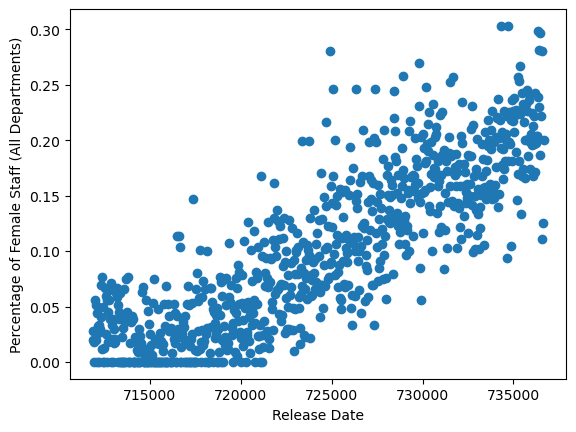

In [57]:
plt.scatter(dataframe.year_month, dataframe.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Departments)')
plt.show()

In [58]:
X = dataframe.year_month.values.reshape(-1, 1)


In [59]:
X

array([[711858],
       [711889],
       [711917],
       [711948],
       [711978],
       [712009],
       [712039],
       [712070],
       [712101],
       [712131],
       [712162],
       [712192],
       [712223],
       [712254],
       [712282],
       [712313],
       [712343],
       [712374],
       [712404],
       [712435],
       [712466],
       [712496],
       [712527],
       [712557],
       [712588],
       [712619],
       [712648],
       [712679],
       [712709],
       [712740],
       [712770],
       [712801],
       [712832],
       [712862],
       [712893],
       [712923],
       [712954],
       [712985],
       [713013],
       [713044],
       [713074],
       [713105],
       [713135],
       [713166],
       [713197],
       [713227],
       [713258],
       [713288],
       [713319],
       [713350],
       [713378],
       [713409],
       [713439],
       [713470],
       [713500],
       [713531],
       [713562],
       [713592],
       [713623

In [60]:
X.shape

(815, 1)

In [61]:
y = dataframe.percent_female

y

0      0.019608
1      0.028205
2      0.017857
3      0.000000
4      0.055556
         ...   
810    0.221830
811    0.280525
812    0.111111
813    0.125000
814    0.200000
Name: percent_female, Length: 815, dtype: float64

In [62]:
model = LinearRegression()

In [63]:
model.fit(X, y)

LinearRegression()

In [64]:
y_pred = model.predict(X)
print(y_pred.shape)

(815,)


In [65]:
type(y)

pandas.core.series.Series

In [66]:
type(X)

numpy.ndarray

In [67]:
# turn X from numpy array to Series
date_transform = pd.Series(list(X))

In [68]:
date_transform

0      [711858]
1      [711889]
2      [711917]
3      [711948]
4      [711978]
         ...   
810    [736511]
811    [736542]
812    [736573]
813    [736603]
814    [736664]
Length: 815, dtype: object

In [69]:
type(date_transform)

pandas.core.series.Series

In [70]:
# turn date_transform from ordinal to timestamp
# https://stackoverflow.com/questions/55224227/convert-a-column-of-dates-from-ordinal-numbers-to-the-standard-date-format-pan
date_transform = date_transform.apply(dt.datetime.fromordinal)

In [71]:
date_transform

0     1950-01-01
1     1950-02-01
2     1950-03-01
3     1950-04-01
4     1950-05-01
         ...    
810   2017-07-01
811   2017-08-01
812   2017-09-01
813   2017-10-01
814   2017-12-01
Length: 815, dtype: datetime64[ns]

In [72]:
type(date_transform)

pandas.core.series.Series

In [73]:
# Use Pandas.to_datetime() and datetime.strftime() method to change to year_month format
date_transform = pd.to_datetime(date_transform).dt.strftime('%Y-%m')

In [74]:
date_transform

0      1950-01
1      1950-02
2      1950-03
3      1950-04
4      1950-05
        ...   
810    2017-07
811    2017-08
812    2017-09
813    2017-10
814    2017-12
Length: 815, dtype: object

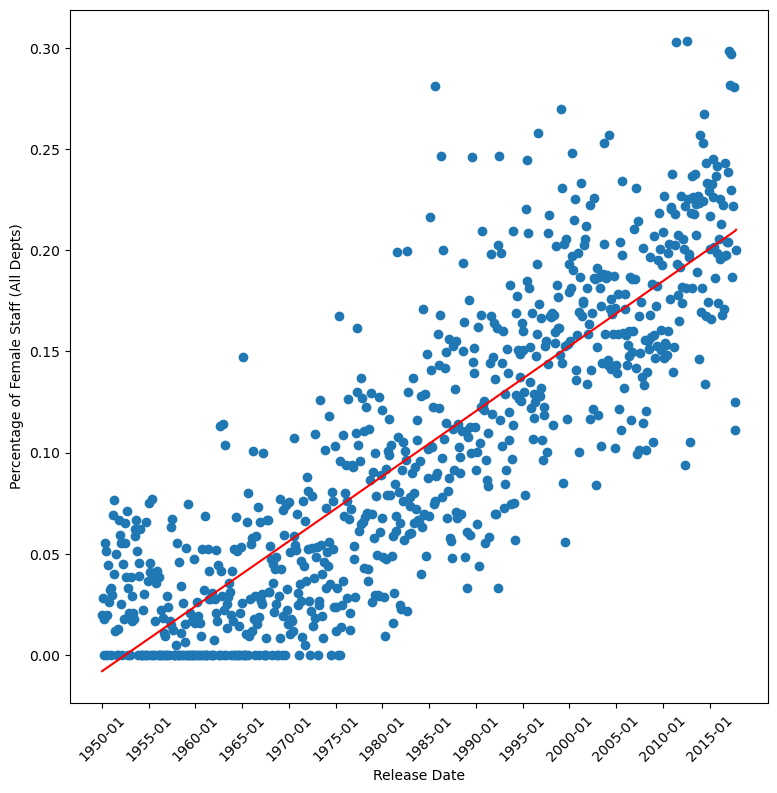

In [75]:
plt.figure(figsize=(9,9))

plt.scatter(date_transform, y)
plt.plot(date_transform, y_pred, color='red')
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Staff (All Depts)')


# https://stackabuse.com/change-tick-frequency-in-matplotlib/
plt.xticks(np.arange(0, len(date_transform)+1, 60),rotation=45)

plt.show()

In [37]:
# GRAPH IF YOU DON'T CONVERT X AXIS FROM ORDINAL TO DATETIME

# plt.figure(figsize=(6,3))

# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.xlabel('Release Date')
# plt.ylabel('Percentage of Female Staff (All Depts)')

# plt.show()

In [76]:
print(model.coef_)
print(model.intercept_)

[8.79195459e-06]
-6.266580642277929
